In [27]:
using Serialization
using Plots
include("run_ens_forecast.jl")
using .run_ens_forecast
pyplot()
using Statistics
using NetCDF
using LaTeXStrings

In [2]:
function rel_err(i, name)
   info = deserialize(open(string("out_"*name*"_", i), "r"))
   return run_ens_forecast.mean(info.errs), run_ens_forecast.mean(info.errs_uncorr), run_ens_forecast.std(info.errs), run_ens_forecast.std(info.errs_uncorr)
end

rel_err (generic function with 1 method)

In [120]:
info.errs_uncorr

1000-element Array{Any,1}:
   2.4035686915227075
   0.9615100941284983
   1.4692959503528347
  57.60620126989387  
  82.25758751903301  
   2.360635811284133 
  63.33681049661986  
   0.8280008018036873
  17.25362072966557  
  56.03524589289659  
   1.3238932084842665
   0.615750719666093 
  72.08792435448879  
   ⋮                 
   1.3191911355770172
   1.1059488686046948
   0.7686626387720156
  27.462497469823518 
   1.3475034583700602
  41.99989001398957  
 355.1191291433961   
  49.05101881606735  
   1.1692188394651943
   2.3349266636727353
   1.4375363164958532
   2.4274781884494625

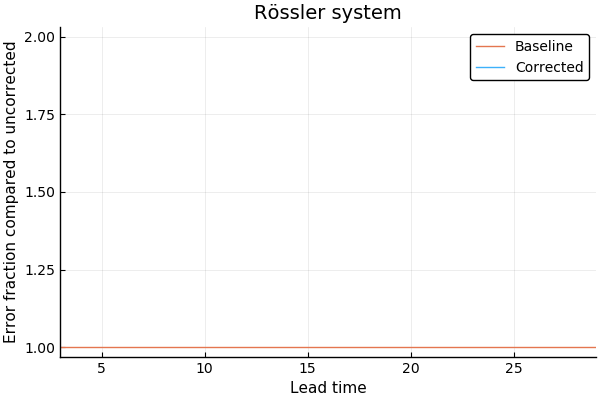

In [28]:
hline([1], label="Baseline", color="#E47650")
plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "rossler"), color="#3DB1FA",
      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Rössler system",
      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.63], label="Estimate from equation")
#savefig("rossler_new.pdf")

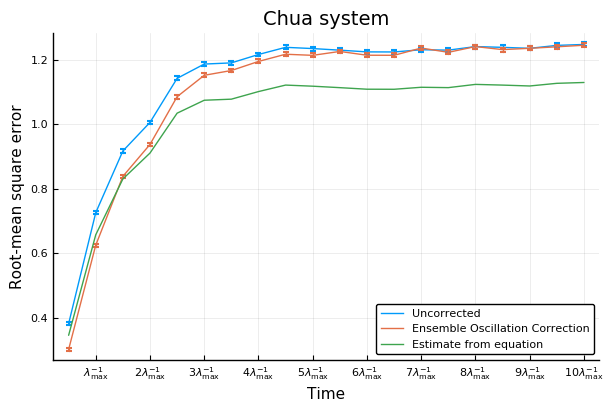

In [156]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19"]#, "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "chua")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Chua system", xticks=(2:2:20,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\lambda_{\mathrm{max}}^{-1}", L"3\lambda_{\mathrm{max}}^{-1}",
            L"4\lambda_{\mathrm{max}}^{-1}", L"5\lambda_{\mathrm{max}}^{-1}", L"6\lambda_{\mathrm{max}}^{-1}",
            L"7\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"9\lambda_{\mathrm{max}}^{-1}",
            L"10\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.18), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("chua2.pdf")

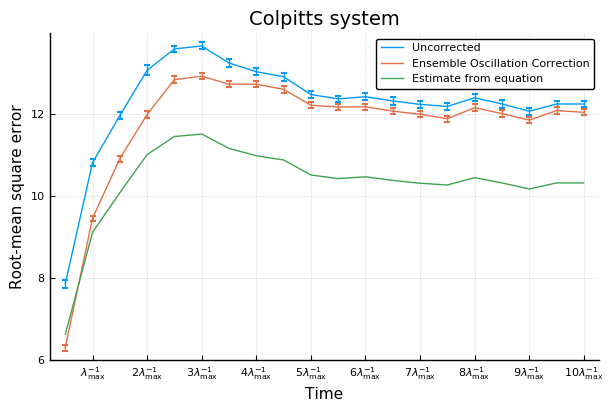

In [147]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19"]#, "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "colpitts")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Colpitts system", xticks=(2:2:20,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\lambda_{\mathrm{max}}^{-1}", L"3\lambda_{\mathrm{max}}^{-1}",
            L"4\lambda_{\mathrm{max}}^{-1}", L"5\lambda_{\mathrm{max}}^{-1}", L"6\lambda_{\mathrm{max}}^{-1}",
            L"7\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"9\lambda_{\mathrm{max}}^{-1}",
            L"10\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.29), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("colpitts2.pdf")

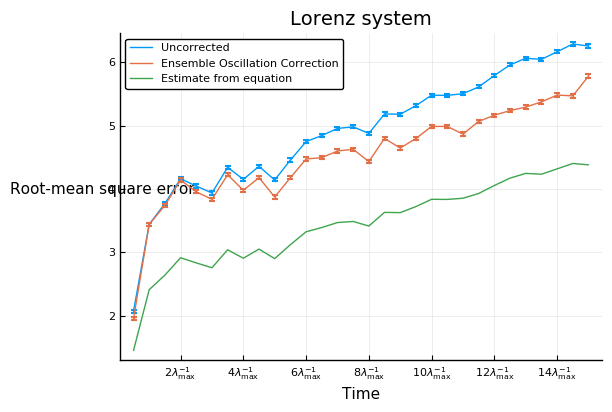

In [309]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "osc")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Lorenz system", xticks=(4:4:30,
        [L"2\lambda_{\mathrm{max}}^{-1}", L"4\lambda_{\mathrm{max}}^{-1}",
            L"6\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"10\lambda_{\mathrm{max}}^{-1}",
            L"12\lambda_{\mathrm{max}}^{-1}", L"14\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.51), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("lorenz2.pdf")

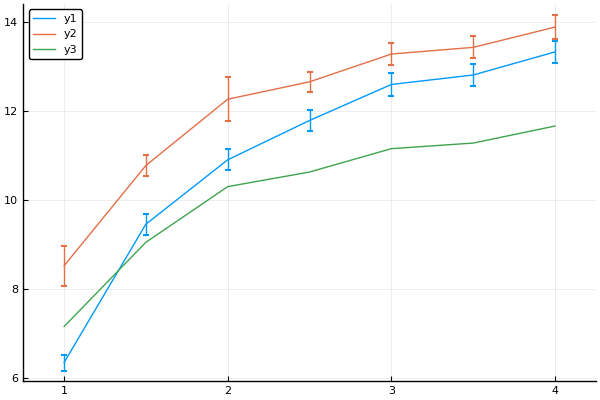

In [68]:
#hline([1], label="Baseline", color="#E47650")
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["0", "1", "2", "3", "4", "5", "6"]
    mean1, mean2, std1, std2 = rel_err.(n, "colpitts")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(1000))
    append!(stderrs2, std2/sqrt(1000))
end
plot((10:5:40)*0.1, means1, yerr=stderrs1)
plot!((10:5:40)*0.1, means2, yerr=stderrs2)
plot!((10:5:40)*0.1, means2*0.84)
#plot!((10:5:40)*0.1, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "chua"), color="#3DB1FA",
    #      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Chua system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(1 - 1/4, 4 + 1/4)
#hline!([0.86], label="Estimate from equation")
#savefig("chua_new.pdf")

In [6]:
using NetCDF

1×1×1×1×20 Array{String,5}:
[:, :, 1, 1, 1] =
 "b7921749"

[:, :, 1, 1, 2] =
 "a1ede6a2"

[:, :, 1, 1, 3] =
 "b8d01062"

...

[:, :, 1, 1, 18] =
 "32b449fd"

[:, :, 1, 1, 19] =
 "e985c472"

[:, :, 1, 1, 20] =
 "10dba66d"

In [212]:
x = ncread("out_chua_da.nc", "sim_id")

10×1×1×1×20 Array{String,5}:
[:, :, 1, 1, 1] =
 "e03d94ff"
 "f4a8f03a"
 "adbeb4db"
 "580d6e5f"
 "ef943c89"
 "9033b086"
 "6ed0d80f"
 "e7398352"
 "c7264416"
 "5df91b13"

[:, :, 1, 1, 2] =
 "395ac9d3"
 "01104515"
 "7444c43a"
 "d949a96a"
 "bae025da"
 "61d12bbb"
 "d5821792"
 "2846ddb0"
 "3a852740"
 "3fb4bdb5"

[:, :, 1, 1, 3] =
 "11556e10"
 "468ecfe1"
 "5a6bef99"
 "d021c1bd"
 "866b0376"
 "5f30e70f"
 "6348e04b"
 "77c9f97e"
 "34227bef"
 "8cf2c840"

...

[:, :, 1, 1, 18] =
 "60a9c1af"
 "20d5d7df"
 "b5487adb"
 "d8fc8aae"
 "3d379911"
 "b9621953"
 "ff3d9f07"
 "058322bd"
 "afba4fd5"
 "806c3794"

[:, :, 1, 1, 19] =
 "d2232a21"
 "09e3f3da"
 "fbddcea7"
 "250ca32f"
 "f2961584"
 "54fbd42e"
 "31206b1d"
 "26813be0"
 "4a7c2edf"
 "c51a9dd6"

[:, :, 1, 1, 20] =
 "18ae6c11"
 "eb72c55f"
 "8252932e"
 "0cd42aeb"
 "c844a8b8"
 "1470c1fb"
 "54f86580"
 "6446966d"
 "7cc4b31c"
 "d5bea61a"

In [213]:
sim_ids = x[:, 1, 1, 1, :]

10×20 Array{String,2}:
 "e03d94ff"  "395ac9d3"  "11556e10"  …  "60a9c1af"  "d2232a21"  "18ae6c11"
 "f4a8f03a"  "01104515"  "468ecfe1"     "20d5d7df"  "09e3f3da"  "eb72c55f"
 "adbeb4db"  "7444c43a"  "5a6bef99"     "b5487adb"  "fbddcea7"  "8252932e"
 "580d6e5f"  "d949a96a"  "d021c1bd"     "d8fc8aae"  "250ca32f"  "0cd42aeb"
 "ef943c89"  "bae025da"  "866b0376"     "3d379911"  "f2961584"  "c844a8b8"
 "9033b086"  "61d12bbb"  "5f30e70f"  …  "b9621953"  "54fbd42e"  "1470c1fb"
 "6ed0d80f"  "d5821792"  "6348e04b"     "ff3d9f07"  "31206b1d"  "54f86580"
 "e7398352"  "2846ddb0"  "77c9f97e"     "058322bd"  "26813be0"  "6446966d"
 "c7264416"  "3a852740"  "34227bef"     "afba4fd5"  "4a7c2edf"  "7cc4b31c"
 "5df91b13"  "3fb4bdb5"  "8cf2c840"     "806c3794"  "c51a9dd6"  "d5bea61a"

In [228]:
([(a, b, c, d) for (a, b, c, d) in rel_err.(sim_ids[:, 1], "chua")])

10-element Array{NTuple{4,Float64},1}:
 (0.38085868335326495, 0.3879759772181231, 0.36454224557248893, 0.37818740576040527)
 (0.38116307395854737, 0.3879759772181231, 0.3661281548558315, 0.37818740576040527) 
 (0.3815388730947505, 0.3879759772181231, 0.3679121772147719, 0.37818740576040527)  
 (0.38198797298446735, 0.3879759772181231, 0.36988927413500655, 0.37818740576040527)
 (0.3825092469095247, 0.3879759772181231, 0.37205726067578104, 0.37818740576040527) 
 (0.38310456480542787, 0.3879759772181231, 0.3744106058708113, 0.37818740576040527) 
 (0.38377062849497423, 0.3879759772181231, 0.37694884542542834, 0.37818740576040527)
 (0.38450797399262915, 0.3879759772181231, 0.3796673557978016, 0.37818740576040527) 
 (0.3853186207491512, 0.3879759772181231, 0.3825598475511206, 0.37818740576040527)  
 (0.3862046224468696, 0.3879759772181231, 0.3856198863715463, 0.37818740576040527)  

In [238]:
x = ncread("out_chua_da.nc", "sim_id")
sim_ids = x[:, 1, 1, 1, :]
idx_min = [argmin([a for (a, b, c, d) in rel_err.(sim_ids[:, i], "chua")]) for i=1:20]
errs_chua_da = [minimum([a for (a, b, c, d) in rel_err.(sim_ids[:, i], "chua")]) for i=1:20]
std_chua_da = [[c for (a, b, c, d) in rel_err.(sim_ids[:, i], "chua")][idx_min[i]] for i=1:20]
x = ncread("out_chua3.nc", "sim_id")
sim_ids = x[1, 1, 1, 1, :]
nda = rel_err.(sim_ids, "chua")
errs_chua_nda = [a[1] for a in nda][:]
std_chua_nda = [a[3] for a in nda][:]
errs_chua_uncorr = [a[2] for a in nda][:]
std_chua_uncorr = [a[4] for a in nda][:]

20-element Array{Float64,1}:
 0.37818740576040527
 0.5423490946237195 
 0.5981321020372629 
 0.5920498894820037 
 0.6253354379116247 
 0.6111592168645309 
 0.6247318960726155 
 0.6114812801758973 
 0.6054363260534751 
 0.6019482119207791 
 0.6049003354779279 
 0.6115355576695053 
 0.6050663035648867 
 0.6072340764708642 
 0.6108516580965996 
 0.6175840606770872 
 0.6095281809906087 
 0.6304283401540663 
 0.6370500028416283 
 0.6601461681234208 

In [234]:
x = ncread("out_colpitts_da2.nc", "sim_id")
x2 = ncread("out_colpitts_da3.nc", "sim_id")
sim_ids = vcat(x[1, 1, 1, :], x2[1, 1, 1, 2:end])
#idx_min = [argmin([a for (a, b, c, d) in rel_err.(sim_ids[i], "colpitts")]) for i=1:20]
errs_colpitts_da = [a[1] for a in rel_err.(sim_ids, "colpitts")]
std_colpitts_da = [a[3] for a in rel_err.(sim_ids, "colpitts")]
x = ncread("out_colpitts3.nc", "sim_id")
sim_ids = x[1, 1, 1, :]
nda = rel_err.(sim_ids, "colpitts")
errs_colpitts_nda = [a[1] for a in nda][:]
errs_colpitts_uncorr = [a[2] for a in nda][:]
std_colpitts_nda = [a[3] for a in nda][:]
std_colpitts_uncorr = [a[4] for a in nda][:]

20-element Array{Float64,1}:
 8.726342308256246 
 9.681698454656804 
 8.168392128447877 
 8.128042929952782 
 8.09492707781616  
 7.985287249999923 
 8.324978146591471 
 8.240356810036511 
 7.878662921272651 
 8.154331522066913 
 8.225861111053586 
 7.8090857810606105
 7.436565669580897 
 8.019681652784127 
 7.5248969443181855
 8.614107730259452 
 8.964455223021064 
 8.243887424465546 
 8.195029531345742 
 7.609600701063236 

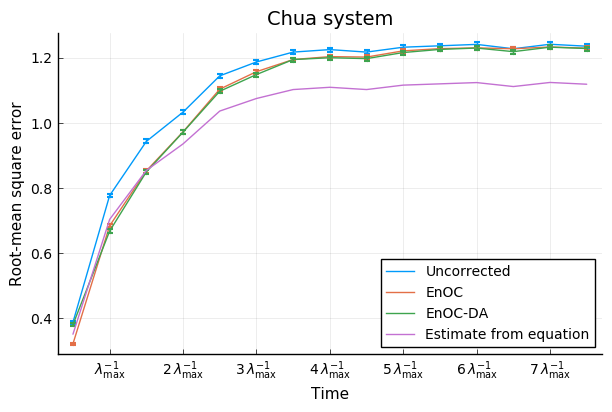

In [239]:
plot(errs_chua_uncorr[1:15], yerr=std_chua_uncorr/sqrt(10000), label="Uncorrected", title="Chua system", xticks=(2:2:14,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\,\lambda_{\mathrm{max}}^{-1}", L"3\,\lambda_{\mathrm{max}}^{-1}",
            L"4\,\lambda_{\mathrm{max}}^{-1}", L"5\,\lambda_{\mathrm{max}}^{-1}", L"6\,\lambda_{\mathrm{max}}^{-1}",
            L"7\,\lambda_{\mathrm{max}}^{-1}"]))
plot!(errs_chua_nda[1:15], yerr=std_chua_nda/sqrt(10000), label="EnOC")
plot!(errs_chua_da[1:15], yerr=std_chua_da/sqrt(10000), label="EnOC-DA")
plot!(errs_chua_uncorr[1:15]*sqrt(1-0.18), label="Estimate from equation", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlabel!("Time")
ylabel!("Root-mean square error")
savefig("chua3.pdf")

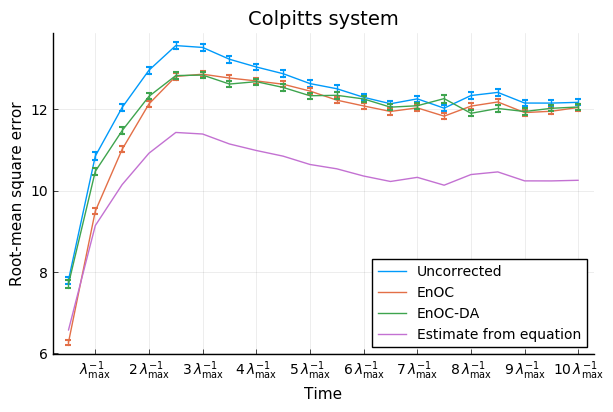

In [235]:
plot(errs_colpitts_uncorr, yerr=std_colpitts_uncorr/sqrt(10000), label="Uncorrected", title="Colpitts system", xticks=(2:2:20,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\,\lambda_{\mathrm{max}}^{-1}", L"3\,\lambda_{\mathrm{max}}^{-1}",
            L"4\,\lambda_{\mathrm{max}}^{-1}", L"5\,\lambda_{\mathrm{max}}^{-1}", L"6\,\lambda_{\mathrm{max}}^{-1}",
            L"7\,\lambda_{\mathrm{max}}^{-1}", L"8\,\lambda_{\mathrm{max}}^{-1}", L"9\,\lambda_{\mathrm{max}}^{-1}",
            L"10\,\lambda_{\mathrm{max}}^{-1}"]))
plot!(errs_colpitts_nda, yerr=std_colpitts_nda/sqrt(10000), label="EnOC")
plot!(errs_colpitts_da, yerr=std_colpitts_da/sqrt(10000), label="EnOC-DA")
plot!(errs_colpitts_uncorr*sqrt(1-0.29), label="Estimate from equation", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlabel!("Time")
ylabel!("Root-mean square error")
savefig("colpitts3.pdf")

In [120]:
x = ncread("out_osc_da2.nc", "sim_id")
sim_ids = x[:, 1, 1, 1, :]

1×31 Array{String,2}:
 "e1bbbd05"  "12d9b96d"  "0b5fad16"  …  "79949f4d"  "fbc9a73c"  "94338fc5"

In [121]:
errs_osc_da = [minimum([b for (a, b, c, d) in rel_err.(sim_ids[:, i], "osc")]) for i=1:15]

15-element Array{Float64,1}:
 2.4880512524031064
 3.5940541938539057
 3.9634281911626674
 4.091082296804941 
 4.2638122616211   
 4.4132346848342525
 4.487335167984716 
 4.598315722736126 
 4.667725635712089 
 4.700006827203813 
 4.764358618045546 
 4.923803662817531 
 5.021358248894346 
 5.086242688007392 
 5.0845286903596865

In [97]:
errs_osc_da2 = [a[1] for a in rel_err.(sim_ids, "osc")]

1×31 Array{Float64,2}:
 2.57419  3.71317  4.05754  4.17954  …  5.78219  5.88558  5.94809  5.99263

In [93]:
[b for (a, b, c, d) in rel_err.(sim_ids[:, 2], "osc")]

BoundsError: BoundsError: attempt to access 31-element Array{String,1} at index [Base.Slice(Base.OneTo(31)), 2]

In [114]:
x = ncread("out_osc2.nc", "sim_id")
sim_ids = x[1, 1, 1, 1, :]
nda = rel_err.(sim_ids, "osc")
errs_osc_nda = [a[1] for a in nda][:]
errs_osc_uncorr = [a[2] for a in nda][:]

SystemError: SystemError: opening file "out_osc_f807fa17": No such file or directory

In [225]:
osc_nda = ncread("out_osc.nc", "sim_id")[1, 1, 1, 1, :]
osc_da = ncread("out_osc_da.nc", "sim_id")[1, 1, 1, 1, :]
errs_osc_nda = [a[1] for a in rel_err.(osc_nda, "osc")]
std_osc_nda = [a[3] for a in rel_err.(osc_nda, "osc")]
errs_osc_da = [a[1] for a in rel_err.(osc_da, "osc")]
std_osc_da = [a[3] for a in rel_err.(osc_da, "osc")]
errs_osc_uncorr = [a[2] for a in rel_err.(osc_da, "osc")]
std_osc_uncorr = [a[4] for a in rel_err.(osc_da, "osc")]

31-element Array{Float64,1}:
 2.5358027532744933
 2.662011077656484 
 2.5762025256499954
 2.580472613042299 
 2.5493316090040055
 2.5542872283080924
 2.5985301661749762
 2.572767778268427 
 2.5776800180853696
 2.538462418151725 
 2.5828244004527527
 2.528926324756424 
 2.5544491632742834
 ⋮                 
 2.511498261698747 
 2.489091243487794 
 2.4917985431802734
 2.413818683219806 
 2.404626629956895 
 2.488900633255822 
 2.5143518067777877
 2.4990492996014972
 2.4821564447755033
 2.4054735951722317
 2.4132929964719967
 2.4479837079548092

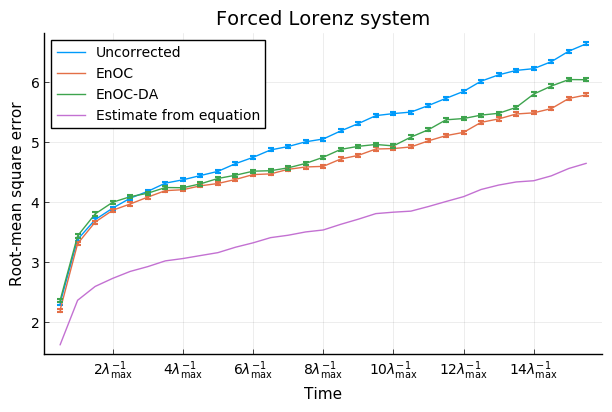

In [229]:
plot(errs_osc_uncorr, yerr=std_osc_uncorr/sqrt(10000), label="Uncorrected", title="Forced Lorenz system",
        xticks=(4:4:30,
        [L"2\lambda_{\mathrm{max}}^{-1}", L"4\lambda_{\mathrm{max}}^{-1}",
            L"6\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"10\lambda_{\mathrm{max}}^{-1}",
            L"12\lambda_{\mathrm{max}}^{-1}", L"14\lambda_{\mathrm{max}}^{-1}"]))
plot!(errs_osc_nda, yerr=std_osc_nda/sqrt(10000), label="EnOC")
plot!(errs_osc_da, yerr=std_osc_da/sqrt(10000), label="EnOC-DA")
plot!(errs_osc_uncorr*sqrt(1-0.51), label="Estimate from equation", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlabel!("Time")
ylabel!("Root-mean square error")
savefig("osc3.pdf")